In [28]:
# importing the Python module
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

# importing the dataset
from sklearn.datasets import load_breast_cancer


In [2]:
df = load_breast_cancer()
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
df["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
x = df["data"]
y = df["target"]

In [9]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Find The Best Model

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
import numpy as np



# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr_scores = cross_val_score(lr, x, y,cv=3)

# Random Forest
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, x, y,cv=3)

# Support Vector Classifier
svc = SVC()
svc_scores = cross_val_score(svc, x, y,cv=3)

# Naive Bayes
Naive_Bayes = GaussianNB()
Naive_Bayes_scores = cross_val_score(Naive_Bayes, x, y,cv=3)


# Calculate averages
lr_avg = np.mean(lr_scores)
rf_avg = np.mean(rf_scores)
svc_avg = np.mean(svc_scores)
Naive_Bayes_avg = np.mean(Naive_Bayes_scores)

# Find the best model
best_model = max([("Logistic Regression", lr_avg), ("Random Forest", rf_avg), ("Support Vector Classifier", svc_avg),("Naive Bayes Classifier:", Naive_Bayes_avg)], key=lambda x: x[1])

# Print results
print("Average scores:")
print("Logistic Regression:", lr_avg)
print("Random Forest:", rf_avg)
print("Support Vector Classifier:", svc_avg)
print("Naive Bayes Classifier:", Naive_Bayes_avg)

print("\nThe best model is:", best_model[0], "with an average score of:", best_model[1])


Average scores:
Logistic Regression: 0.9259877573734001
Random Forest: 0.9426822481914302
Support Vector Classifier: 0.9699499165275459
Naive Bayes Classifier: 0.8135781858653311

The best model is: Support Vector Classifier with an average score of: 0.9699499165275459


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [30]:
model = SVC()

model.fit(x_train, y_train)


model.score(x_test,y_test)

0.9861111111111112

Text(0.5, 1.0, 'Confusion Matrix')

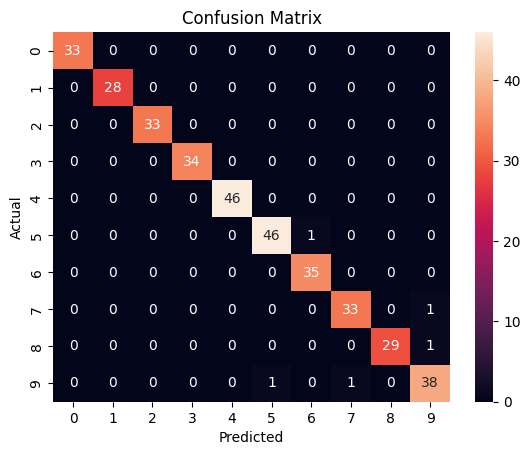

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

seaborn.heatmap(cm, annot=True)

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.title("Confusion Matrix")

In [32]:
import pickle

pickle.dump(model, open("Cancer cell classification.pkl", "wb"))